In [ ]:
# Basic Neural network in tensorflow
 
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


Epoch 1/10


c:\Users\patel\.conda\envs\Deep-Learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4547 - loss: 0.9527 - val_accuracy: 0.4550 - val_loss: 0.9810
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4551 - loss: 0.9483 - val_accuracy: 0.4500 - val_loss: 0.9477
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4158 - loss: 0.9419 - val_accuracy: 0.4400 - val_loss: 0.9178
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4398 - loss: 0.8885 - val_accuracy: 0.4350 - val_loss: 0.8927
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4171 - loss: 0.8674 - val_accuracy: 0.4250 - val_loss: 0.8683
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4253 - loss: 0.8331 - val_accuracy: 0.4150 - val_loss: 0.8465
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4140 - loss: 0.8376 - val_accuracy: 0.4000 - val_loss: 0.8264
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4060 - loss: 0.8232 - val_accuracy: 0.3800 - val_loss: 0.8079
Epo

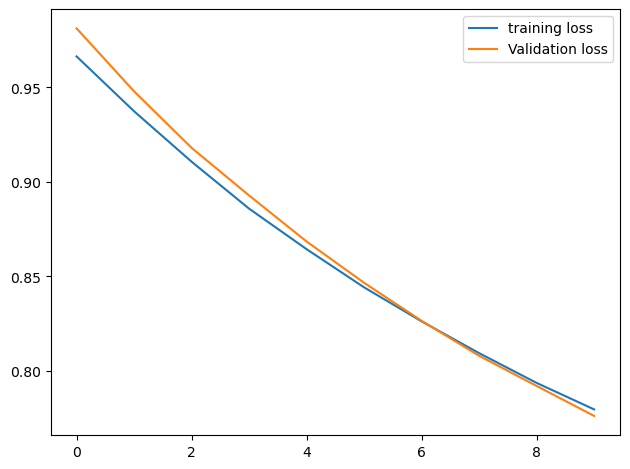

In [5]:
X = tf.random.normal((1000,2))
y = tf.where(X[:,0] * X[:,1]> 0, 1,0)

model = models.Sequential([
    layers.Dense(4, activation='relu', input_shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label=['training loss'])
plt.plot(history.history['val_loss'], label=['Validation loss'])
plt.tight_layout()
plt.legend()
plt.show()

In [16]:
## Basic Neural Network in Pytorch

import torch
import torch.nn as nn
import torch.optim as optim


class simpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


model = simpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

X = torch.randn(1000,2)
y = (X[:,0] * X[:,1] > 0).float()

for epoch in range(10):
    optimizer.zero_grad()
    output = model(X)
    print(output.shape)
    loss = criterion(output, y.view(-1,1))
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, loss: {loss.item()}')


torch.Size([1000, 1])
Epoch 1, loss: 0.7306789755821228
torch.Size([1000, 1])
Epoch 2, loss: 0.730057954788208
torch.Size([1000, 1])
Epoch 3, loss: 0.7294395565986633
torch.Size([1000, 1])
Epoch 4, loss: 0.7288235425949097
torch.Size([1000, 1])
Epoch 5, loss: 0.7282099723815918
torch.Size([1000, 1])
Epoch 6, loss: 0.7275992035865784
torch.Size([1000, 1])
Epoch 7, loss: 0.7269914150238037
torch.Size([1000, 1])
Epoch 8, loss: 0.7263870239257812
torch.Size([1000, 1])
Epoch 9, loss: 0.7257857322692871
torch.Size([1000, 1])
Epoch 10, loss: 0.7251871824264526


In [ ]:
## Mnist data set

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1,28*28) / 255.0

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy is: {test_acc:.4f}')

Epoch 1/5


c:\Users\patel\.conda\envs\Deep-Learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8683 - loss: 0.4755 - val_accuracy: 0.9578 - val_loss: 0.1528
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9617 - loss: 0.1330 - val_accuracy: 0.9654 - val_loss: 0.1152
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9747 - loss: 0.0860 - val_accuracy: 0.9708 - val_loss: 0.0973
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9814 - loss: 0.0609 - val_accuracy: 0.9730 - val_loss: 0.0917
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9869 - loss: 0.0448 - val_accuracy: 0.9709 - val_loss: 0.0997
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.9674 - loss: 0.1116
Test Accuracy is: 0.9716
